/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_4680/3288334042.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_fire['Period'] = 'Before Fire'
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_4680/3288334042.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_during_fire['Period'] = 'During Fire'
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_4680/3288334042.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


TypeError: unsupported operand type(s) for *: 'float' and 'builtin_function_or_method'

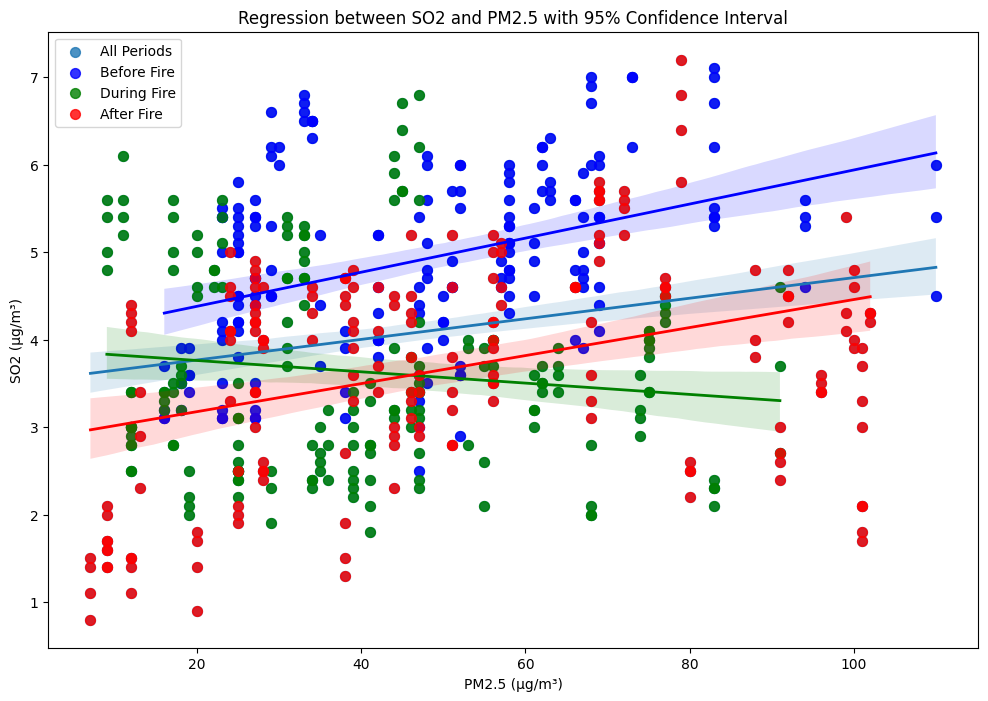

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the specific sheet from the Excel file
data_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter data for each period
df_before_fire = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
df_during_fire = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
df_after_fire = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Combine the data with an additional 'Period' column
df_before_fire['Period'] = 'Before Fire'
df_during_fire['Period'] = 'During Fire'
df_after_fire['Period'] = 'After Fire'

df_combined = pd.concat([df_before_fire, df_during_fire, df_after_fire])

# Create the plot with seaborn
plt.figure(figsize=(12, 8))

# Use seaborn's `regplot` to plot regression lines with confidence intervals
sns.regplot(x='PM2.5', y='SO2', data=df_combined, scatter_kws={'s':50}, line_kws={'lw':2}, ci=95, label='All Periods')

# Add separate regression lines for each period
sns.regplot(x='PM2.5', y='SO2', data=df_before_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ci=95, label='Before Fire', color='blue')
sns.regplot(x='PM2.5', y='SO2', data=df_during_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ci=95, label='During Fire', color='green')
sns.regplot(x='PM2.5', y='SO2', data=df_after_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ci=95, label='After Fire', color='red')

# Set labels, title, and legend
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('SO2 (µg/m³)')
plt.title('Regression between SO2 and PM2.5 with 95% Confidence Interval')
plt.legend()

# Show R values on the plot
def add_r_value(ax, x, y, period_name, color):
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]
    slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)
    ax.text(0.05, 0.95 - 0.05*period_name.index, f'{period_name} R={r_value:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', color=color,
            bbox=dict(boxstyle='round', alpha=0.5))

# Add R values
add_r_value(plt.gca(), df_before_fire['PM2.5'], df_before_fire['SO2'], 'Before Fire', 'blue')
add_r_value(plt.gca(), df_during_fire['PM2.5'], df_during_fire['SO2'], 'During Fire', 'green')
add_r_value(plt.gca(), df_after_fire['PM2.5'], df_after_fire['SO2'], 'After Fire', 'red')

plt.tight_layout()
plt.show()

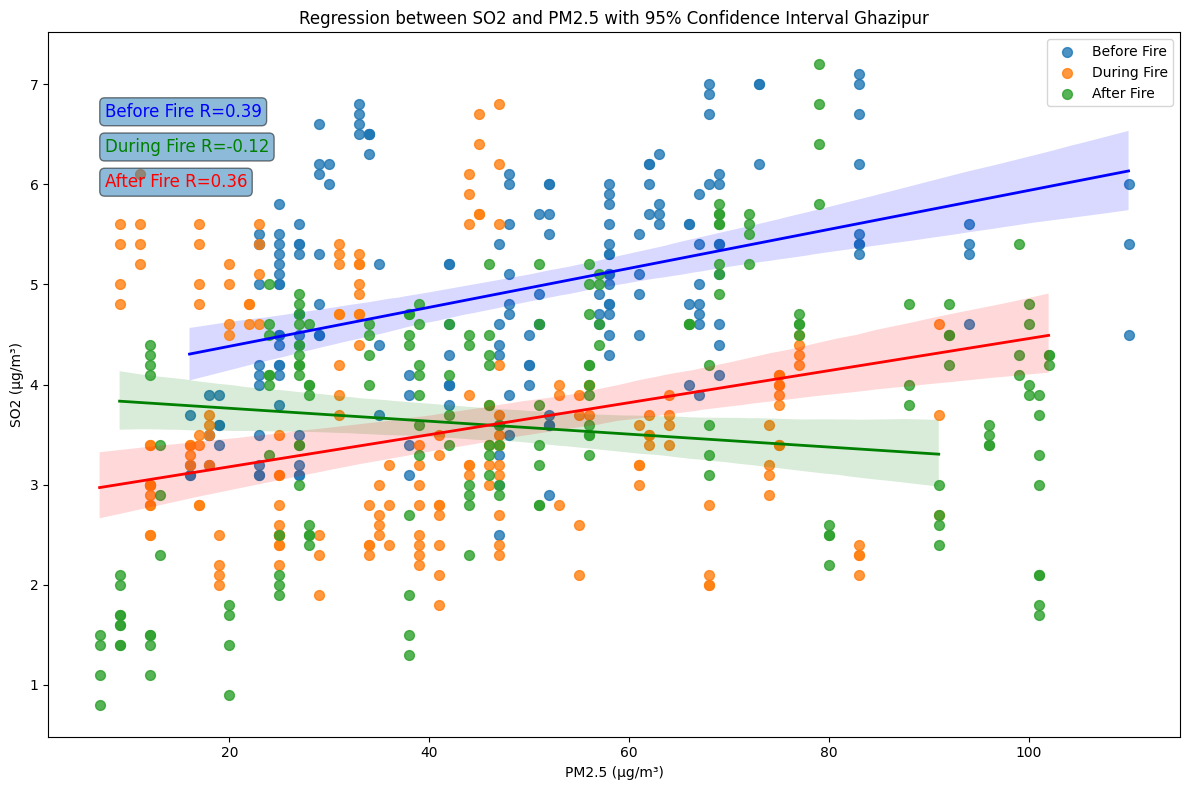

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Load the specific sheet from the Excel file
data_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter data for each period
df_before_fire = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
df_during_fire = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
df_after_fire = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Define a function to plot regression with confidence intervals and R value
def plot_regression_with_ci(ax, x, y, label, color):
    # Remove NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)
    
    # Plot regression line with confidence intervals using seaborn
    sns.regplot(x=x_clean, y=y_clean, scatter_kws={'s':50}, line_kws={'lw':2, 'color': color}, ci=95, ax=ax, label=label)
    
    # Add R value to the plot
    ax.text(0.05, 0.95 - 0.05 * len(ax.lines), f'{label} R={r_value:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', color=color,
            bbox=dict(boxstyle='round', alpha=0.5))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot regression for each period separately
plot_regression_with_ci(ax, df_before_fire['PM2.5'], df_before_fire['SO2'], 'Before Fire', 'blue')
plot_regression_with_ci(ax, df_during_fire['PM2.5'], df_during_fire['SO2'], 'During Fire', 'green')
plot_regression_with_ci(ax, df_after_fire['PM2.5'], df_after_fire['SO2'], 'After Fire', 'red')

# Set labels, title, and legend
ax.set_xlabel('PM2.5 (µg/m³)')
ax.set_ylabel('SO2 (µg/m³)')
ax.set_title('Regression between SO2 and PM2.5 with 95% Confidence Interval Ghazipur')
ax.legend(loc='best')  # Ensure the legend is properly displayed

plt.tight_layout()
plt.show()